# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [9]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['test/']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [10]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [11]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [ ]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

Fields are not too badly skewed.

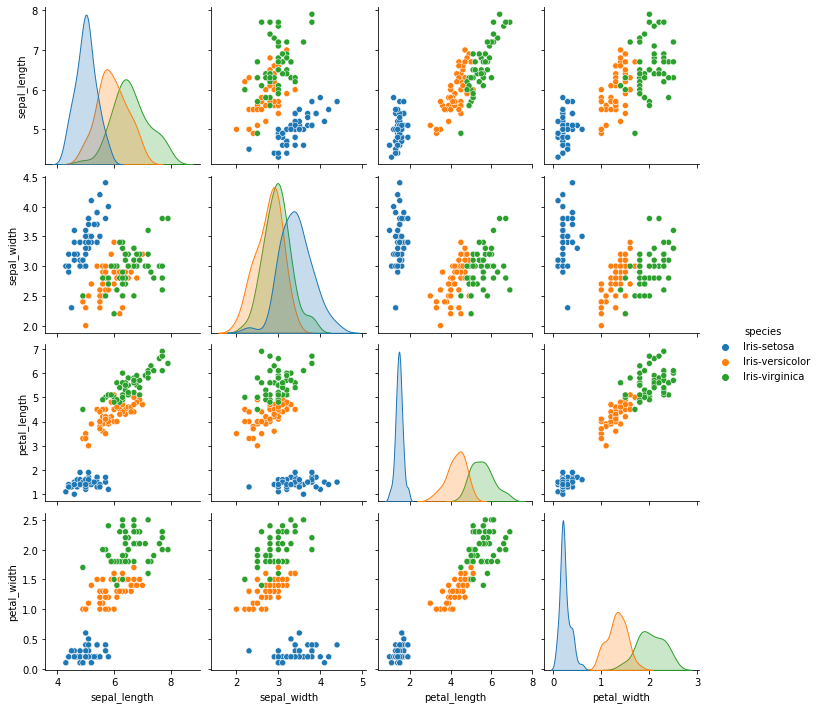

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [56]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.94736842 0.94736842 0.91891892 1.        ]


0.9534139402560455

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

bernoulli = BernoulliNB()
GNB = GaussianNB()
Multi = MultinomialNB()

scoresBern = cross_val_score(bernoulli,X,y,n_jobs=cv_N, cv=cv_N)
print('Bernoulli scores: ',end='')
print(scoresBern)
scoresGNB = cross_val_score(GNB,X,y,n_jobs=cv_N, cv=cv_N)
print('Gaussian scores: ',end='')
print(scoresGNB)
scoresMulti = cross_val_score(Multi,X,y,n_jobs=cv_N, cv=cv_N)
print('Multinomial scores: ',end='')
print(scoresMulti)

print('{gaussian:',np.mean(scoresGNB),',','bernoulli:',np.mean(scoresBern),',','multinomial:',np.mean(scoresMulti),'}')


Bernoulli scores: [0.31578947 0.31578947 0.32432432 0.32432432]
Gaussian scores: [0.94736842 0.94736842 0.91891892 1.        ]
Multinomial scores: [1.         0.97368421 0.89189189 1.        ]
{gaussian: 0.9534139402560455 , bernoulli: 0.3200568990042674 , multinomial: 0.966394025604552 }


**Answer :** The Bernoulli model has shown a worse performance due to the characteristics of the group of analyzed data, since this method only describes if an event happened or not (binary nature).

Resposta esperada: 

{'gaussian': 0.9534139402560455,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.966394025604552}


Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [54]:
X = data[data.columns[:-3]]
y = data.species

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

bernoulli = BernoulliNB()
GNB = GaussianNB()
Multi = MultinomialNB()

scoresBern = cross_val_score(bernoulli,X,y,n_jobs=cv_N, cv=cv_N)
print('Bernoulli scores: ',end='')
print(scoresBern)
scoresGNB = cross_val_score(GNB,X,y,n_jobs=cv_N, cv=cv_N)
print('Gaussian scores: ',end='')
print(scoresGNB)
scoresMulti = cross_val_score(Multi,X,y,n_jobs=cv_N, cv=cv_N)
print('Multinomial scores: ',end='')
print(scoresMulti)

print('{',end='')
print('gaussian:',np.mean(scoresGNB),end=',')
print('bernoulli:',np.mean(scoresBern),end=',')
print('multinomial:', np.mean(scoresMulti),end='')
print('}')



Bernoulli scores: [0.31578947 0.31578947 0.32432432 0.32432432]
Gaussian scores: [0.73684211 0.84210526 0.72972973 0.86486486]
Multinomial scores: [0.65789474 0.65789474 0.64864865 0.62162162]
{gaussian: 0.7933854907539118,bernoulli: 0.3200568990042674,multinomial: 0.6465149359886202}


Resposta esperada: 

{'gaussian': 0.7933854907539118,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.6465149359886202}



#Come up with your observations after taking away the very predictive features, which model works better

**Answer :** After removing the preventive characteristics, it's noticeable that the Gaussian model has shown a better performance compared to the other models. This is due to the fact that the Gaussian model is more often used in continuous data and usually gives better results in this area.

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

C:\Users\Aluno\AppData\Local\Temp/ipykernel_3800/2795417381.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new['sepal_length_copy%s' % i] = X['sepal_length']


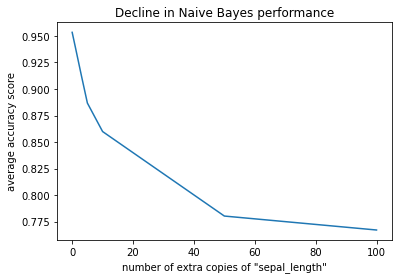

In [31]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


Resposta esperada

![download.png](attachment:download.png)